RBFカーネルPCAの実装

In [73]:
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh
import numpy as np


def rbf_kernel_pca(X, gamma, n_components):
    # MxN次元のデータセットに対して、ペアごとの距離の二乗を計算
    sq_dists = pdist(X, 'sqeuclidean')

    # 距離を正方行列に変換
    mat_sq_dists = squareform(sq_dists)

    # 対称カーネル行列を計算
    K = np.exp(-gamma * mat_sq_dists)

    # 中心化
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # 固有対を取得
    eig_vals, eig_vecs = eigh(K)
    eig_vals, eig_vecs = eig_vals[::-1], eig_vecs[:, ::-1]

    # 上位の固有ベクトルを収集
    X_pc = np.column_stack([eig_vecs[:, i] for i in range(n_components)])

    return X_pc

半月形の分離

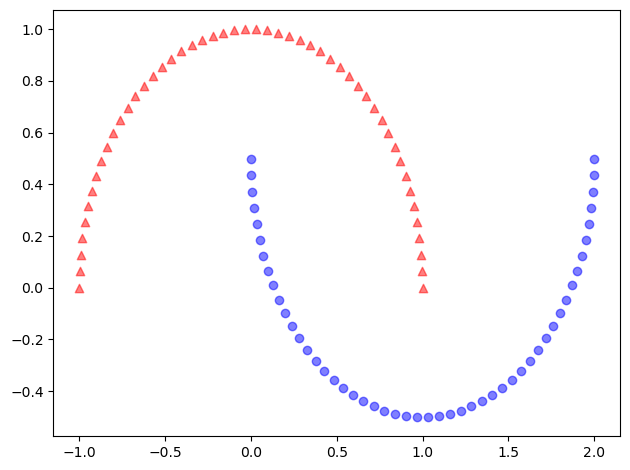

In [74]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100, random_state=123)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

PCAで分離してみる

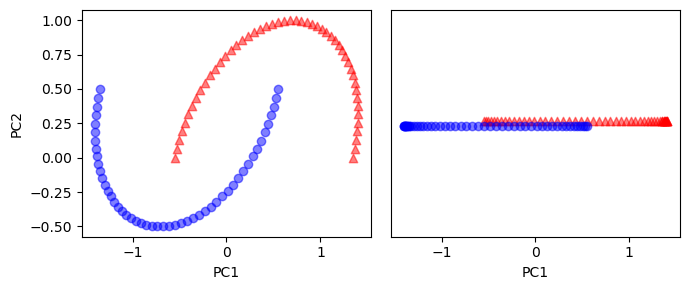

In [75]:
from sklearn.decomposition import PCA

sk_pca = PCA(n_components=2)
X_spca = sk_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_spca[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y == 0, 0], np.zeros((50, 1)) + 0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((50, 1)) - 0.02, color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

RBFカーネルPCAを試してみる

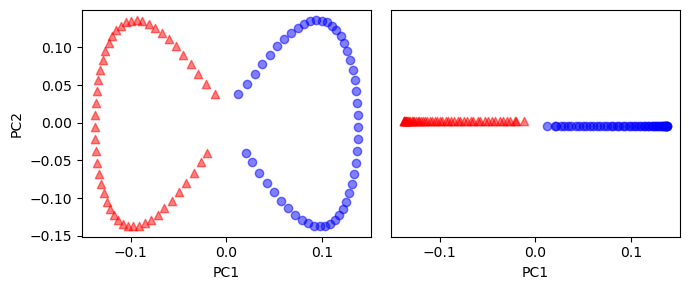

In [76]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y == 0, 0], np.zeros((50, 1)) + 0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((50, 1)) - 0.02, color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()


同心円の分離

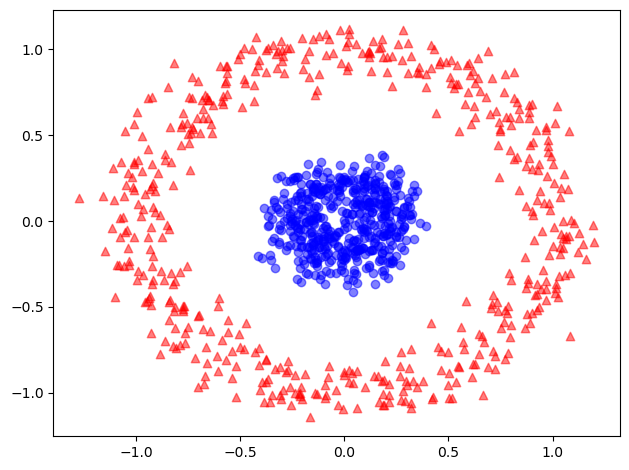

In [77]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

PCA でアプローチ

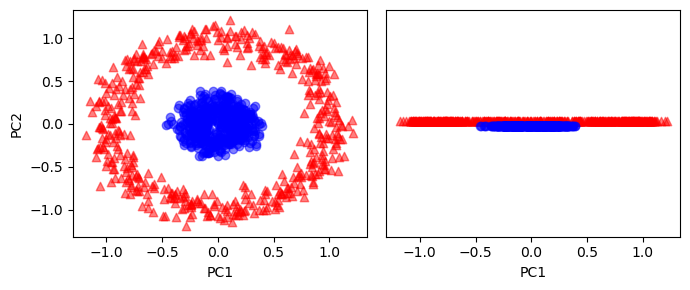

In [78]:
sk_pca = PCA(n_components=2)
X_spca = sk_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1], color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y == 0, 0], np.zeros((500, 1)) + 0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((500, 1)) - 0.02, color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

RBFカーネルPCAを適用

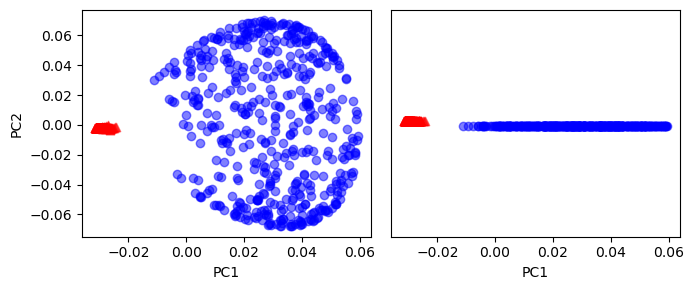

In [79]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y == 0, 0], np.zeros((500, 1)) + 0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((500, 1)) - 0.02, color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

RBFカーネルPCAを書き換えて固有値を返すようにする

In [80]:
def rbf_kernel_pca2(X, gamma, n_components):
    sq_dists = pdist(X, 'sqeuclidean')
    mat_sq_dists = squareform(sq_dists)
    K = np.exp(-gamma * mat_sq_dists)
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    eig_vals, eig_vecs = eigh(K)
    eig_vals, eig_vecs = eig_vals[::-1], eig_vecs[:, ::-1]
    X = np.column_stack([eig_vecs[:, i] for i in range(n_components)])
    # ここまでは同じ

    # 固有値を返すようにする
    lambdas = [eig_vals[i] for i in range(n_components)]

    return X, lambdas


新しい半月を作って、26番目の値を新しい値として、射影する


X[25] shall be new data: [1.8713187  0.00928245]
X[25] should be projected: [ 0.07877284 -0.12867888]
X[25] is re-projected: [ 0.07877284 -0.12858888]


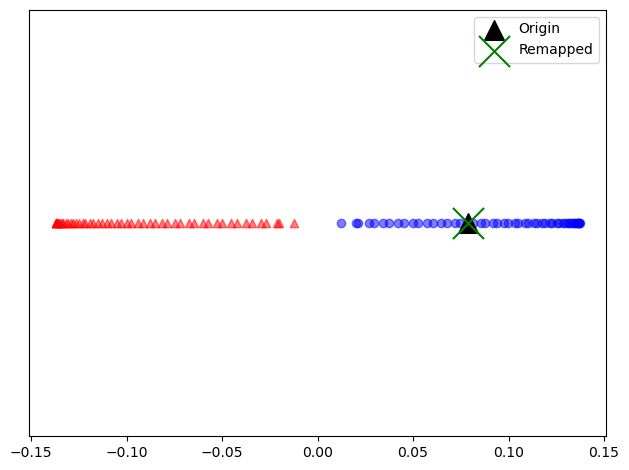

In [81]:
X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca2(X, gamma=15, n_components=2)

x_new = X[25]
print('X[25] shall be new data: %s' % x_new)

x_proj = alphas[25]
print('X[25] should be projected: %s' % x_proj)


def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum((x_new - row) ** 2) for row in X])
    k = np.exp(-gamma * pair_dist)
    return k.dot(alphas / lambdas)


x_reproj = project_x(x_new, X, gamma=15, alphas=alphas, lambdas=lambdas)
print('X[25] is re-projected: %s' % x_reproj)

plt.scatter(alphas[y == 0,0], np.zeros(50), color='red', marker='^', alpha=0.5)
plt.scatter(alphas[y==1,0], np.zeros(50), color='blue', marker='o', alpha=0.5)
plt.scatter(x_proj[0], 0, color='black', marker='^', s=200, label='Origin')
plt.scatter(x_reproj[0], 0, color='green', marker='x', s=500, label='Remapped')
plt.yticks([], [])
plt.legend(scatterpoints=1)
plt.tight_layout()
plt.show()

scikit-learn で実装

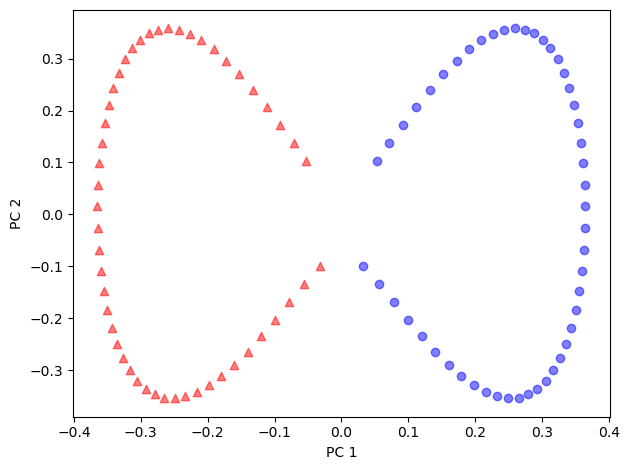

In [82]:
from sklearn.decomposition import KernelPCA

X, y = make_moons(n_samples=100, random_state=123)
sk_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)

X_s_kpca = sk_kpca.fit_transform(X)

plt.scatter(X_s_kpca[y==0,0], X_s_kpca[y==0,1], color='red', marker='^', alpha=0.5)
plt.scatter(X_s_kpca[y==1,0], X_s_kpca[y==1,1], color='blue', marker='o', alpha=0.5)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.tight_layout()
plt.show()